# Fpl Opimizer Data Analysis and ML model Evaluation

## Data Analysis and Feature Selection

The Data has already been scraped from Vaastav's git hub repo from 2015/16 season until 2024/25 season and was merged into a data frame. First we will load the data: 

In [69]:
import pandas as pd

df = pd.read_csv('/Users/sohumguha/Desktop/FPL_OPTIMIZER/data/all_seasons_merged.csv', encoding='ISO-8859-1', low_memory=False)


print(df.shape)
df.head(10)


(224143, 66)


,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW,season,position,team,xP,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,starts,modified
0,Aaron_Cresswell,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,454,0.0,0.0,10,0.0,0,0,0.0,454.0,0.0,0.0,2016-08-15T19:00:00Z,15 Aug 20:00,0.0,0.0,0,0.0,0.0,4,0,0.0,0,0,0.0,0,1,0,14023,0.0,0.0,0.0,1.0,2.0,0.0,0,0,0,0,55,False,0.0,0,1,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron_Lennon,0,3.0,0.0,0.0,0,6,0,1.0,2.0,0.3,0.0,0.0,142,0.0,0.0,3,0.0,0,0,0.9,142.0,8.2,0.0,2016-08-13T14:00:00Z,13 Aug 15:00,0.0,0.0,15,0.0,0.0,17,0,0.0,0,0,1.0,0,1,0,13918,1.0,2.0,0.0,1.0,1.0,0.0,1,0,0,0,60,True,0.0,0,1,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron_Ramsey,0,26.0,0.0,0.0,0,5,0,2.0,22.0,4.9,1.0,0.0,16,0.0,0.0,8,0.0,3,0,3.0,16.0,2.2,0.0,2016-08-14T15:00:00Z,14 Aug 16:00,0.0,0.0,60,0.0,0.0,9,0,0.0,0,0,2.0,0,1,0,163170,2.0,0.0,1.0,4.0,3.0,23.0,2,0,0,0,80,True,0.0,0,1,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye_DoucourÃÂ©,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,482,0.0,0.0,7,0.0,0,0,0.0,482.0,0.0,0.0,2016-08-13T14:00:00Z,13 Aug 15:00,0.0,0.0,0,0.0,0.0,13,0,0.0,0,0,0.0,0,1,0,1051,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0,0,50,False,0.0,0,1,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Rahman_Baba,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,80,0.0,0.0,10,0.0,0,0,0.0,80.0,0.0,0.0,2016-08-15T19:00:00Z,15 Aug 20:00,0.0,0.0,0,0.0,0.0,20,0,0.0,0,0,0.0,0,1,0,1243,0.0,0.0,0.0,1.0,2.0,0.0,0,0,0,0,55,True,0.0,0,1,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Abel_HernÃÂ¡ndez,1,15.0,0.0,0.0,0,10,0,0.0,10.0,12.2,0.0,0.0,163,0.0,0.0,4,1.0,1,0,5.7,163.0,14.4,1.0,2016-08-13T11:30:00Z,13 Aug 12:30,0.0,0.0,90,1.0,0.0,8,0,0.0,0,0,1.0,0,1,0,26039,2.0,0.0,2.0,1.0,2.0,30.0,5,0,0,0,60,True,0.0,0,1,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Adama_Diomande,0,28.0,0.0,0.0,2,29,0,3.0,20.0,16.8,3.0,0.0,164,0.0,1.0,4,1.0,1,1,10.7,164.0,45.2,1.0,2016-08-13T11:30:00Z,13 Aug 12:30,0.0,0.0,90,0.0,0.0,8,0,0.0,0,0,6.0,0,1,0,38151,6.0,0.0,0.0,1.0,2.0,45.0,8,0,0,0,45,True,0.0,0,1,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Adam_Clayton,0,37.0,0.0,0.0,0,6,0,4.0,31.0,2.2,0.0,0.0,283,0.0,0.0,6,4.0,1,0,1.4,283.0,3.2,0.0,2016-08-13T14:00:00Z,13 Aug 15:00,0.0,0.0,90,0.0,0.0,14,0,0.0,0,0,2.0,0,1,0,17663,1.0,0.0,1.0,1.0,1.0,9.0,2,0,0,0,45,True,0.0,0,1,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Adam_Federici,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,30,0.0,0.0,9,0.0,0,0,0.0,30.0,0.0,0.0,2016-08-14T12:30:00Z,14 Aug 13:30,0.0,0.0,0,0.0,0.0,11,0,0.0,0,0,0.0,0,1,0,4315,0.0,0.0,0.0,3.0,1.0,0.0,0,0,0,0,45,True,0.0,0,1,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Adam_Forshaw,0,29.0,0.0,0.0,0,3,0,3.0,25.0,1.3,0.0,0.0,286,0.0,0.0,6,2.0,1,0,0.3,286.0,2.0,0.0,2016-08-13T14:00:00Z,13 Aug 15:00,0.0,0.0,69,0.0,0.0,14,0,0.0,0,0,4.0,0,1,0,2723,0.0,0.0,0.0,1.0,1.0,0.0,1,0,0,0,45,True,0.0,1,1,2016-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now Lets take a closer look into teh features: 

In [70]:

print(df.columns.tolist())


['name', 'assists', 'attempted_passes', 'big_chances_created', 'big_chances_missed', 'bonus', 'bps', 'clean_sheets', 'clearances_blocks_interceptions', 'completed_passes', 'creativity', 'dribbles', 'ea_index', 'element', 'errors_leading_to_goal', 'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded', 'goals_scored', 'ict_index', 'id', 'influence', 'key_passes', 'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out', 'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals', 'penalties_conceded', 'penalties_missed', 'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 'winning_goals', 'yellow_cards', 'GW', 'season', 'position', 'team', 'xP', 'expected_assists', 'expected_goal_involvements', 'expected_goals', 'expected_goals_conceded', 'starts', 'modifi

Lets Examine These features in a bit more depth. I know some features only go utpo a certian season, while others start only after a certian season

In [44]:
# Exclude the 'season' column from the groupby application to avoid the FutureWarning
missing_by_season = df.groupby('season').apply(lambda x: x.isna().mean(), include_groups=False).T

# Build a dictionary that maps each feature to the seasons it has data in
feature_season_coverage = {
    feature: missing_by_season.columns[missing_by_season.loc[feature] < 1.0].tolist()
    for feature in missing_by_season.index
}

# Convert to DataFrame for display
coverage_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in feature_season_coverage.items()]))

# Show all columns and disable line width limit
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Show a preview
coverage_df.head(10)

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW,position,team,xP,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,starts,modified
0,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2016-17,2020-21,2020-21,2020-21,2022-23,2022-23,2022-23,2022-23,2022-23,2024-25
1,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2017-18,2021-22,2021-22,2021-22,2023-24,2023-24,2023-24,2023-24,2023-24,NaN
2,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2018-19,2022-23,2022-23,2022-23,2024-25,2024-25,2024-25,2024-25,2024-25,NaN
3,2019-20,2019-20,NaN,NaN,NaN,2019-20,2019-20,2019-20,NaN,NaN,2019-20,NaN,NaN,2019-20,NaN,NaN,2019-20,NaN,2019-20,2019-20,2019-20,NaN,2019-20,NaN,2019-20,NaN,NaN,NaN,2019-20,NaN,NaN,2019-20,2019-20,NaN,2019-20,2019-20,NaN,2019-20,2019-20,2019-20,2019-20,NaN,NaN,NaN,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,2019-20,NaN,2019-20,2019-20,2023-24,2023-24,2023-24,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-21,2020-21,NaN,NaN,NaN,2020-21,2020-21,2020-21,NaN,NaN,2020-21,NaN,NaN,2020-21,NaN,NaN,2020-21,NaN,2020-21,2020-21,2020-21,NaN,2020-21,NaN,2020-21,NaN,NaN,NaN,2020-21,NaN,NaN,2020-21,2020-21,NaN,2020-21,2020-21,NaN,2020-21,2020-21,2020-21,2020-21,NaN,NaN,NaN,2020-21,2020-21,2020-21,2020-21,2020-21,2020-21,2020-21,2020-21,2020-21,NaN,2020-21,2020-21,2024-25,2024-25,2024-25,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-22,2021-22,NaN,NaN,NaN,2021-22,2021-22,2021-22,NaN,NaN,2021-22,NaN,NaN,2021-22,NaN,NaN,2021-22,NaN,2021-22,2021-22,2021-22,NaN,2021-22,NaN,2021-22,NaN,NaN,NaN,2021-22,NaN,NaN,2021-22,2021-22,NaN,2021-22,2021-22,NaN,2021-22,2021-22,2021-22,2021-22,NaN,NaN,NaN,2021-22,2021-22,2021-22,2021-22,2021-22,2021-22,2021-22,2021-22,2021-22,NaN,2021-22,2021-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-23,2022-23,NaN,NaN,NaN,2022-23,2022-23,2022-23,NaN,NaN,2022-23,NaN,NaN,2022-23,NaN,NaN,2022-23,NaN,2022-23,2022-23,2022-23,NaN,2022-23,NaN,2022-23,NaN,NaN,NaN,2022-23,NaN,NaN,2022-23,2022-23,NaN,2022-23,2022-23,NaN,2022-23,2022-23,2022-23,2022-23,NaN,NaN,NaN,2022-23,2022-23,2022-23,2022-23,2022-23,2022-23,2022-23,2022-23,2022-23,NaN,2022-23,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2023-24,2023-24,NaN,NaN,NaN,2023-24,2023

We can see above not all of the features are used continusly used for all of the 9 seasons. I can see few intersting features that I belive will be impactful, which aren't availble throughout all the seasons. For now These are the features I have slected:

#### Potential Features:
lengend: 

    * --> feature used UNTIL 2018/19
	** --> feature used FROM 2021/22
	*** --> feature used FROM 2022/23
- assists
- goals
- attempted_passes*
- big_chances_created*
- big_chances_missed*
- bonus
- bps
- clean sheets
- clearences_blocks_interceptions*
- creativity*
- dribbles*
- errors_leading_to_goals*
- red_cards ---> should instant indicate not to pick player regardless of predicted points
- penalty_saved
- selected
- target_missed*
- team_a_score
- team_h_score
- threat
- transfers_in
- transfers_out
- winning_goals
- team**
- xP**
- expected_assists***
- expected_goal_involvements***
- expected_goals ***
- expected_goals_conceded
- 
- **Engineered features:**
	- overperform_expected_assists = assists - expected_assists
	- overperform_expected_goal_involvements = goals - expected_goals
	- overperform_expected_goals = (goals + assist) - expected_goal_involvements

Looking at this initial list of features, it is clear to see that there are quite a few features that have stopped been recorded onwards the 2018/2019 season. 

I will have access to all the field if I start using data, form the 2022/23 season. Important fields such as xG and xA are recoroded from this season. The data will also be more relavent to the upcoming 2025/2026 season, as it will have data for majourity of the currently active players in the premier league.Regrdless, I will still be working with a big data set. Considering all this I will only use features from the 2022/23 season onwards:

In [45]:
import pandas as pd

df = pd.read_csv('/Users/sohumguha/Desktop/FPL_OPTIMIZER/data/2022-23_to_2024-25_ORIGINAL.csv', encoding='ISO-8859-1', low_memory=False)


print(df.shape)
df.head(10)


(83835, 50)


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,season,modified,mng_clean_sheets,mng_draw,mng_goals_scored,mng_loss,mng_underdog_draw,mng_underdog_win,mng_win
0,Nathan Redmond,MID,Southampton,1.5,0,0,3,0,0.0,403,0.0,0.0,0.0,0.0,8,0,0,0.0,0.0,2022-08-06T14:00:00Z,1,18,0,0,0,0,1,0,5871,0,1,4,0.0,1,0,0,0,55,False,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Junior Stanislas,MID,Bournemouth,1.1,0,0,3,0,0.0,58,0.0,0.0,0.0,0.0,2,0,0,0.0,0.0,2022-08-06T14:00:00Z,1,2,0,0,0,0,1,0,9491,0,0,2,0.0,1,0,0,0,50,True,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Armando Broja,FWD,Chelsea,2.0,0,0,3,0,0.3,150,0.0,0.0,0.0,0.0,3,0,0,2.5,5.2,2022-08-06T16:30:00Z,15,8,0,0,0,0,1,0,124903,0,1,0,19.0,1,0,0,0,55,False,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fabian SchÃÂ¤r,DEF,Newcastle,2.4,0,3,43,1,14.6,366,0.0,0.0,0.0,0.0,7,0,1,10.6,66.0,2022-08-06T14:00:00Z,90,16,0,0,0,0,1,0,40132,0,0,2,25.0,15,0,0,0,45,True,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jonny Evans,DEF,Leicester,1.9,0,0,15,0,1.3,249,0.0,0.0,0.0,0.0,6,2,0,1.5,14.0,2022-08-07T13:00:00Z,90,4,0,0,0,0,1,0,24256,0,2,2,0.0,1,0,0,0,45,True,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Brennan Johnson,FWD,Nott'm Forest,1.3,0,0,3,0,0.9,394,0.0,0.0,0.0,0.0,7,2,0,0.6,0.0,2022-08-06T14:00:00Z,90,15,0,0,0,0,1,0,171887,0,0,2,6.0,2,0,0,0,60,False,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Cheick DoucourÃÂ©,MID,Crystal Palace,1.1,0,0,16,0,3.8,514,0.0,0.0,0.0,0.0,1,1,0,1.0,5.8,2022-08-05T19:00:00Z,74,1,0,0,0,0,1,0,9875,0,2,0,0.0,2,0,0,0,50,True,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Oliver Hammond,MID,Nott'm Forest,0.5,0,0,0,0,0.0,553,0.0,0.0,0.0,0.0,7,0,0,0.0,0.0,2022-08-06T14:00:00Z,0,15,0,0,0,0,1,0,3300,0,0,2,0.0,0,0,0,0,45,False,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Luke Cundle,MID,Wolves,1.5,0,0,0,0,0.0,485,0.0,0.0,0.0,0.0,5,0,0,0.0,0.0,2022-08-06T14:00:00Z,0,11,0,0,0,0,1,0,36521,0,1,2,0.0,0,0,0,0,45,False,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fin Stevens,DEF,Brentford,1.0,0,0,0,0,0.0,540,0.0,0.0,0.0,0.0,6,0,0,0.0,0.0,2022-08-07T13:00:00Z,0,10,0,0,0,0,1,0,15679,0,2,2,0.0,0,0,0,0,40,False,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see there are no columns which have NaN values, excpet for a few columns that are irrelavent for our purposes. We will have to handle this, but I won't worry about it for now. 

## Initial Features Selected 2022/23 Onwards:

Key Idea: All these features are outcomes of a match. If I want to predict points for a future gameweek, I will have to use data from the past. So I will train the model with last 3, 5, and 1 gameweeks of each feature. And with this data it will have to predict how many points the player will score next game week. 

last_5_gw_... will capture streaks of form

last_3_gw_... will capture consistancy and will be less volatile 

last_1_gw_... will account for recent spikes of form

For some feature it will be cumulative sum, for some it will be average, and for some it will be normalized; whichever is more applicable. 


### Features:

- assists_last_1_gw
- assists_last_3_gw
- assists_last_5_gw
- goals_last_1_gw
- goals_last_3_gw
- goals_last_5_gw
- bonus_last_1_gw
- bonus_last_3_gw_avg
- bonus_last_5_gw_avg
- clean_sheets_last_1_gw
- clean_sheets_last_3_gw
- clean_sheets_last_5_gw
- red_cards_last_1_gw
- penalty_saved_last_1_gw
- penalty_saved_last_3_gw
- penalty_saved_last_5_gw
- selected_last_1_gw
- selected_last_3_gw_norm
- selected_last_5_gw_norm
- threat_last_1_gw
- threat_last_3_gw_avg
- threat_last_5_gw_avg
- creativity_last_1_gw
- creativity_last_3_gw_avg
- creativity_last_5_gw_avg
- influence_last_1_gw
- influence_last_1_gw_avg
- influence_last_1_gw_avg
- transfers_in_norm
- transfers_out_norm
- xP_last_1_gw
- xP_last_3_gw_avg
- xP_last_5_gw_avg
- expected_assists_last_1_gw
- expected_assists_last_3_gw_avg
- expected_assists_last_5_gw_avg
- expected_goal_involvements_last_1_gw
- expected_goal_involvements_last_3_gw_avg
- expected_goal_involvements_last_5_gw_avg
- expected_goals_last_1_gw
- expected_goals_last_3_gw_avg
- expected_goals_last_5_gw_avg
- expected_goals_conceded_last_1_gw
- expected_goals_conceded_last_3_gw_avg
- expected_goals_conceded_last_5_gw_avg
- points_last_1_gw
- points_last_3_gw
- points_last_5_gw
- was_home ---> change true/false to 1/0


Since I am analyzing player form, it is crucial account for teams that the player has faced. Form is hewavily dependant on the difficulty of features.

**Features to account for next team difficulty of the TEAM the PLAYER WILL FACE:**
- next_opponent_team
- next_oppponent_fdr  ----> _will have to manually assign this data based on knowledge and experience and based on home/away_
- next_opponent_clean_sheets_last_1_gw
- next_opponent_clean_sheets_last_3_gw
- next_opponent_clean_sheets_last_5_gw
- next_opponent_goals_conceded_last_1_gw
- next_opponent_goals_conceded_last_3_gw
- next_opponent_goals_conceded_last_5_gw
- next_opponent_goals_scored_last_1_gw
- next_opponent_goals_scored_last_3_gw
- next_opponent_goals_scored_last_5_gw

**To account for form based on team difficulty the PLAYER HAS FACED:**

- avg_opponent_fdr_last_1_gw ---->  _will have to manually assign this data based on knowledge and experience and based on home/away_
- avg_opponent_fdr_last_3_gw
- avg_opponent_fdr_last_5_gw
- avg_opponent_clean_sheets_last_1
- avg_opponent_clean_sheets_last_3
- avg_opponent_clean_sheets_last_5
- avg_opponent_goals_conceded_last_1
- avg_opponent_goals_conceded_last_3
- avg_opponent_goals_conceded_last_5
- avg_opponent_goals_scored_last_1
- avg_opponent_goals_scored_last_3
- avg_opponent_goals_scored_last_5

**Additional features:**
- overperf_expected_assists_last_1_gw  = assists_last_1_gw  - expected_assists_last_1_gw
- overperf_expected_assists_last_3_gw = assists_last_3_gw  - expected_assists_last_3_gw
- overperf_expected_assists_last_5_gw = assists_last_5_gw  - expected_assists_last_5_gw
- overperf_expected_goals_last_1_gw  = goals_last_1_gw  - expected_goals_last_1_gw
- overperf_expected_goals_last_3_gw = goals_last_3_gw  - expected_goals_last_3_gw
- overperf_expected_goals_last_5_gw = goals_last_5_gw  - expected_goals_last_5_gw
- overperf_xgi_last_1_gw  = (goals_last_1_gw + assists_last_1_gw)  - expected_goal_involvements_last_1_gw
- overperf_xgi_last_3_gw  = (goals_last_3_gw + assists_last_3_gw)  - expected_goal_involvements_last_3_gw
- overperf_xgi_last_5_gw  = (goals_last_5_gw + assists_last_5_gw)  - expected_goal_involvements_last_5_gw
- starts_ratio = (starts_last_5_gw) / 5
- overperf_xP_last_1_gw = total_points_last_1_gw - xP_last_1_gw
- overperf_xP_last_3_gw = total_points_last_3_gw - xP_last_3_gw
- overperf_xP_last_5_gw = total_points_last_5_gw - xP_last_5_gw

**Sensitive features which captures value (player cost) going up and down:** 
- value_avg_change_last_1_gw = value_last_1_gw.diff().mean()
- value_avg_change_last_3_gw = value_last_3_gw.diff().mean()
- value_avg_change_last_5_gw = value_last_5_gw.diff().mean()
- value_volatility_last_1_gw = value_last_1_gw.std()
- value_volatility_last_3_gw = value_last_3_gw.std()
- value_volatility_last_5_gw = value_last_5_gw.std()

**Target Feature:**
- total_points_next_gw



## Preperation and Cleaning of Dataset

Now that I have selected the inital set of fearures, I will now have to prepare a _clean_ dataset that I can trian a ML model on. 

My immidiate steps now are to: 
- Assign each player unique ID's that is global through all the seasons
- Assign Team ID to all teams from 2022/23 to 2025/2026 (use one-hot encoding)
- One-hot encode player positions for each individual player
- Write code to compute all the engineered features



I will be verrifying if the player ID's are the same and stays unique to one player regardless of players leaving and new players constantly joining a premier league club. 

In [46]:
df[['element', 'name']].drop_duplicates().groupby('element').count().reset_index().query('name > 1')

,element,name
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3
...,...,...
799,800,2
800,801,2
801,802,3
802,803,2


In [47]:
df[df['element'] == 1]['name'].unique()

array(['CÃ\x83Â©dric Alves Soares', 'Folarin Balogun',
       'FÃ\x83Â¡bio Ferreira Vieira'], dtype=object)

With further examination, we can clearly see that player ID's are not unique from different seasons (2022/23 - 2024/25). To tackle this inconvenience, I will have to create a new feature which has unique players ID's for each player regardless of the season. I will also have to account for all the new players that join premier league clubs for the 2025/26 season. 

### Global Player ID map

In [48]:
import pandas as pd

# Create a DataFrame with unique (season, element) combos
player_keys = df[['season', 'element', 'name']].drop_duplicates()

# We'll assign global IDs based on fuzzy-matching names across seasons
from collections import defaultdict
from fuzzywuzzy import fuzz

global_id = 1
global_id_map = {}
name_to_id = {}

# Process season by season
seasons = sorted(player_keys['season'].unique())
for season in seasons:
    season_players = player_keys[player_keys['season'] == season]
    for _, row in season_players.iterrows():
        elem = row['element']
        name = row['name']
        matched_id = None
        
        for existing_name in name_to_id:
            score = fuzz.token_sort_ratio(name, existing_name)
            if score > 90:
                matched_id = name_to_id[existing_name]
                break
        
        if matched_id is None:
            matched_id = global_id
            global_id += 1
        
        global_id_map[(season, elem)] = matched_id
        name_to_id[name] = matched_id

Now we will merge the global ID's to the main data frame:

In [49]:
# Map the global IDs back to your main DataFrame
df['global_player_id'] = df.apply(lambda row: global_id_map.get((row['season'], row['element']), -1), axis=1)

# Optional sanity check
print(df[['name', 'season', 'element', 'global_player_id']].drop_duplicates().sort_values(by='global_player_id').head(20))

# Save updated file
df.to_csv("../data/2022-23_to_2024-25_clean.csv", index=False)

                     name   season  element  global_player_id
0          Nathan Redmond  2022-23      403                 1
27120      Nathan Redmond  2023-24      600                 1
1        Junior Stanislas  2022-23       58                 2
2           Armando Broja  2022-23      150                 3
27137       Armando Broja  2023-24      193                 3
56259       Armando Broja  2024-25      156                 3
3         Fabian SchÃÂ¤r  2022-23      366                 4
26883     Fabian SchÃÂ¤r  2023-24      427                 4
56379     Fabian SchÃÂ¤r  2024-25      415                 4
28513         Jonny Evans  2023-24      703                 5
56369         Jonny Evans  2024-25      371                 5
4             Jonny Evans  2022-23      249                 5
56809     Brennan Johnson  2024-25      491                 6
5         Brennan Johnson  2022-23      394                 6
26578     Brennan Johnson  2023-24      450                 6
6      C

By inspecting the entries in our mapping, we can see that each player mapped to an unique ID regardless of the season, as intended. My Data frame is now ready to be used to make my training data set. Note this is excluding all the new players from the upcoming 2025/26 season. I will have to update this once the new season starts.

### Assigning Team ID

Now I will be adding a unique ID to each team, including the 3 new promoted teams for the upcoming 2025/26 season:

In [50]:
import pandas as pd
import json
import os
import requests

# Define data directory relative to current notebook
data_dir = "../data"
team_id_file = os.path.join(data_dir, "team_ids.json")
csv_input_path = os.path.join(data_dir, "2022-23_to_2024-25_clean.csv")
csv_output_path = os.path.join(data_dir, "2022-23_to_2024-25_clean.csv")

# Ensure the directory exists
os.makedirs(data_dir, exist_ok=True)

# Load your main DataFrame
df = pd.read_csv(csv_input_path, low_memory=False)

# Step 1: Collect all known teams from your dataset
dataset_teams = set(df['team'].dropna().unique())

# Step 2: Fetch current teams from FPL API
try:
    url = "https://fantasy.premierleague.com/api/bootstrap-static/"
    api_data = requests.get(url).json()
    api_teams = [t['name'] for t in api_data['teams']]
    print(f"Found {len(api_teams)} teams from FPL API.")
except Exception as e:
    print("Failed to fetch FPL API teams:", e)
    api_teams = []

# Step 3: Combine both
all_teams = sorted(set(dataset_teams).union(api_teams))

# Step 4: Load existing team_id mapping or create new one
if os.path.exists(team_id_file):
    with open(team_id_file, 'r') as f:
        team_to_id = json.load(f)
    print("Loaded existing team ID mapping.")
else:
    team_to_id = {}
    print("Creating new team ID mapping.")

# Step 5: Assign IDs to unseen teams
current_max_id = max(team_to_id.values(), default=-1)
for team in all_teams:
    if team not in team_to_id:
        current_max_id += 1
        team_to_id[team] = current_max_id
        print(f"Assigned team '{team}' ID {current_max_id}")

# Step 6: Save the updated mapping
with open(team_id_file, 'w') as f:
    json.dump(team_to_id, f)
    print(f"Saved team ID mapping to {team_id_file}")

# Step 7: Apply to your DataFrame
df['team_id'] = df['team'].map(team_to_id)

# Save updated df
df.to_csv(csv_output_path, index=False)
print(f"Saved updated DataFrame to {csv_output_path}")
print(team_to_id)

Found 20 teams from FPL API.
Loaded existing team ID mapping.
Saved team ID mapping to ../data/team_ids.json
Saved updated DataFrame to ../data/2022-23_to_2024-25_clean.csv
{'Arsenal': 0, 'Aston Villa': 1, 'Bournemouth': 2, 'Brentford': 3, 'Brighton': 4, 'Burnley': 5, 'Chelsea': 6, 'Crystal Palace': 7, 'Everton': 8, 'Fulham': 9, 'Ipswich': 10, 'Leeds': 11, 'Leicester': 12, 'Liverpool': 13, 'Luton': 14, 'Man City': 15, 'Man Utd': 16, 'Newcastle': 17, "Nott'm Forest": 18, 'Sheffield Utd': 19, 'Southampton': 20, 'Spurs': 21, 'Sunderland': 22, 'West Ham': 23, 'Wolves': 24}


### One Hot Encode Player Positions to Each Player

This an important feature(s) to add, to let the model learn which other features and linked to which postion. For exmaple, clean sheets are significant for defneders and goal keeprs as they get 4 points for a clean sheet; while midfileders get 1 point andf forwards get none. Hence, the importance of knowing what postion each player plays in. We will use a buit in library by using Pandas' built-in method `pd.get_dummies`, to One Hot Encode Player Positions to each player

In [53]:
import pandas as pd

# I noticed GK player encoding was missing so I had to reload this backup file
df = pd.read_csv("../data/2022-23_to_2024-25_clean.csv", low_memory=False)

# === Step 2: Drop rows with position == "AM" ===
df = df[df['position'] != 'AM'].copy()

# === Step 3: Keep only valid FPL positions ===
valid_positions = ['GK', 'DEF', 'MID', 'FWD']
df = df[df['position'].isin(valid_positions)].copy()

# === Step 4: One-hot encode the 'position' column ===
position_dummies = pd.get_dummies(df['position'], prefix='pos', dtype=int)
df = pd.concat([df, position_dummies], axis=1)

# === Step 5: Sort by player and time for stability ===
df["kickoff_time"] = pd.to_datetime(df["kickoff_time"], errors="coerce")
df = df.sort_values(["global_player_id", "kickoff_time"]).reset_index(drop=True)

# === Step 6: Save cleaned DataFrame ===
df.to_csv("../data/2022-23_to_2024-25_clean.csv", index=False)
print("Cleaned dataset saved to 2022-23_to_2024-25_clean.csv")

df.head(10)

Cleaned dataset saved to 2022-23_to_2024-25_clean.csv


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,season,modified,mng_clean_sheets,mng_draw,mng_goals_scored,mng_loss,mng_underdog_draw,mng_underdog_win,mng_win,global_player_id,team_id,pos_DEF,pos_FWD,pos_GK,pos_MID
0,Nathan Redmond,MID,Southampton,1.5,0,0,3,0,0.0,403,0.0,0.0,0.0,0.0,8,0,0,0.0,0.0,2022-08-06 14:00:00+00:00,1,18,0,0,0,0,1,0,5871,0,1,4,0.0,1,0,0,0,55,False,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1
1,Nathan Redmond,MID,Southampton,1.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,19,0,0,0.0,0.0,2022-08-13 14:00:00+00:00,0,11,0,0,0,0,2,0,6353,0,2,2,0.0,0,-636,190,826,55,True,0,2,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1
2,Nathan Redmond,MID,Southampton,0.3,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,26,0,0,0.0,0.0,2022-08-20 14:00:00+00:00,0,10,0,0,0,0,3,0,5926,0,2,1,0.0,0,-905,218,1123,54,False,0,3,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1
3,Nathan Redmond,MID,Southampton,-0.3,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,39,0,0,0.0,0.0,2022-08-27 11:30:00+00:00,0,14,0,0,0,0,4,0,5352,0,1,0,0.0,0,-800,145,945,54,True,0,4,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1
4,Nathan Redmond,MID,Southampton,-0.3,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,50,0,0,0.0,0.0,2022-08-30 18:45:00+00:00,0,6,0,0,0,0,5,0,4990,0,1,2,0.0,0,-543,87,630,53,True,0,5,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1
5,Nathan Redmond,MID,Southampton,0.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,60,0,0,0.0,0.0,2022-09-03 14:00:00+00:00,0,20,0,0,0,0,6,0,4884,0,0,1,0.0,0,-336,217,553,53,False,0,6,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1
6,Nathan Redmond,MID,Southampton,0.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,71,0,0,0.0,0.0,2022-09-16 19:00:00+00:00,0,2,0,0,0,0,8,0,4337,0,0,1,0.0,0,-420,0,420,53,False,0,8,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1
7,Nathan Redmond,MID,Southampton,0.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,89,0,0,0.0,0.0,2022-10-01 14:00:00+00:00,0,8,0,0,0,0,9,0,3806,0,2,1,0.0,0,-563,0,563,53,True,0,9,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1
8,Nathan Redmond,MID,Southampton,0.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,97,0,0,0.0,0.0,2022-10-08 14:00:00+00:00,0,13,0,0,0,0,10,0,3502,0,0,4,0.0,0,-312,0,312,53,False,0,10,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1
9,Nathan Redmond,MID,Southampton,0.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,108,0,0,0.0,0.0,2022-10-16 13:00:00+00:00,0,19,0,0,0,0,11,0,3368,0,1,1,0.0,0,-138,0,138,53,True,0,11,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1


We have succesfully One Hot Encoded Player Position to each player

## Team-Centric Features
#### Assign Fixture Difficulty Rating

First, we will directly use the FPL API to map the feature 'opponent_team' which is a number to a team name, which inturn will be assigned the team_id that I created in the previos step. This will make it easier to calculate the features related ot fdr, such as: next_oppponent_fdr , avg_opponent_fdr_last_1_gw, avg_opponent_fdr_last_3_gw, avg_opponent_fdr_last_5_gw.

In [54]:
# Load FPL team ID to name
bootstrap = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/").json()
teams = pd.DataFrame(bootstrap['teams'])
fpl_id_to_name = dict(zip(teams['id'], teams['name']))

# Load your global team_to_id mapping
with open("../data/team_ids.json", "r") as f:
    team_to_id = json.load(f)

# Step 1: Add opponent_team_name column
df['opponent_team_name'] = df['opponent_team'].map(fpl_id_to_name)

# Step 2: Map to global opponent_team_id
df['opponent_team_id'] = df['opponent_team_name'].map(team_to_id)

# Sanity check
print(df[['opponent_team', 'opponent_team_name', 'opponent_team_id']].drop_duplicates().head())

# Save
df.to_csv("../data/2022-23_to_2024-25_clean.csv", index=False)

   opponent_team opponent_team_name  opponent_team_id
0             18              Spurs                21
1             11              Leeds                11
2             10             Fulham                 9
3             14            Man Utd                16
4              6           Brighton                 4


THIS APPROACH ABOVE WAS ACTUALY INCORRECT. The FPL API only uses data from 2025/2026 season, which means teams that are not present in that season will not get mapped correctly. Instead we will have to look at Vaastav's repo and use master_team_list.csv to map to do this correctly. Once the 2024/25 season actually starts I will have to use an approach similar to the one above.

Approach using master_team_list.csv fron Vaastav's repo to prepare training data set: 

In [71]:
import pandas as pd
import json

# === Load your main FPL data ===
df = pd.read_csv("../data/2022-23_to_2024-25_clean.csv", low_memory=False)

# === Load your local master list ===
master = pd.read_csv("../data/master_team_list.csv", dtype={"team": int})
# Expecting columns exactly: season,team,team_name

# Build a dict: (season,team) -> team_name
master_map = {
    (row.season, row.team): row.team_name
    for row in master.itertuples(index=False)
}

# Map directly into df
df["opponent_team_name"] = df.apply(
    lambda r: master_map.get((r["season"], r["opponent_team"])),
    axis=1
)

# Optional check: see which combos didn’t find a name
missing = (
    df[df["opponent_team_name"].isna()]
      [["season","opponent_team"]]
      .drop_duplicates()
)
if not missing.empty:
    print("Missing team names for these (season,team) pairs:\n", missing)

# === Load your global name->ID map ===
with open("../data/team_ids.json") as f:
    global_map = json.load(f)
if isinstance(global_map, list):
    global_map = {e["name"]: e["id"] for e in global_map}

# Now map names to IDs (will produce NaN for any unmapped names)
df["opponent_team_id"] = df["opponent_team_name"].map(global_map)

# Optional: check which names didn’t get an ID
bad_ids = (
    df[df["opponent_team_id"].isna()]
      ["opponent_team_name"]
      .drop_duplicates()
)
if not bad_ids.empty:
    print("These team names didn’t map to a global ID:\n", bad_ids)

# === Save the result ===
df.to_csv("../data/2022-23_to_2024-25_clean.csv", index=False)
print("Done — your CSV now has opponent_team_name and opponent_team_id columns.")

Done — your CSV now has opponent_team_name and opponent_team_id columns.


### Assign relative FDR

Since the fdr data is not available, I will attempt to create a function that will predict fdr. It is importnat to consider fdr is based on both the teams. For example if Ipswitch is playing Arsenal away at the Emeraites, fdr would be quite high. However, if Manchester City is playing Arsenal at home, fdr wouldn't nearly be as high, infact it would be middle to low. For now I will tackle this by assigning a matrix of fdr which will adress all the possible fixtures, and then use a function which will also use 'was_home' to calculate the final fdr.

In [72]:
import pandas as pd
import json

# Load your match-level FPL data
df = pd.read_csv("../data/2022-23_to_2024-25_clean.csv")

# Load relative FDR JSON
with open("../data/relative_fdr_V2.json", "r") as f:
    relative_fdr_map = json.load(f)

# Define function to lookup FDR
def get_relative_fdr(row):
    team = row["team"]
    opponent = row["opponent_team_name"]
    side = "H" if row["was_home"] else "A"
    
    try:
        return relative_fdr_map[team][opponent][side]
    except KeyError:
        return None  # if data missing

# Apply to each row
df["relative_fdr"] = df.apply(get_relative_fdr, axis=1)

# Save updated version
df.to_csv("../data/2022-23_to_2024-25_clean.csv", index=False)
print("Saved with relative FDRs.")
df.head(10)

/var/folders/bp/1y4vldf10t3cpq328p2lbqzc0000gn/T/ipykernel_46848/4024994030.py:5: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/2022-23_to_2024-25_clean.csv")


Saved with relative FDRs.


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,expected_assists,expected_goal_involvements,expected_goals,expected_goals_conceded,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,starts,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,season,modified,mng_clean_sheets,mng_draw,mng_goals_scored,mng_loss,mng_underdog_draw,mng_underdog_win,mng_win,global_player_id,team_id,pos_DEF,pos_FWD,pos_GK,pos_MID,opponent_team_name,opponent_team_id,relative_fdr
0,Nathan Redmond,MID,Southampton,1.5,0,0,3,0,0.0,403,0.0,0.0,0.0,0.0,8,0,0,0.0,0.0,2022-08-06 14:00:00+00:00,1,18,0,0,0,0,1,0,5871,0,1,4,0.0,1,0,0,0,55,False,0,1,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1,Spurs,21,5.0
1,Nathan Redmond,MID,Southampton,1.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,19,0,0,0.0,0.0,2022-08-13 14:00:00+00:00,0,11,0,0,0,0,2,0,6353,0,2,2,0.0,0,-636,190,826,55,True,0,2,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1,Leeds,11,3.0
2,Nathan Redmond,MID,Southampton,0.3,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,26,0,0,0.0,0.0,2022-08-20 14:00:00+00:00,0,10,0,0,0,0,3,0,5926,0,2,1,0.0,0,-905,218,1123,54,False,0,3,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1,Leicester,12,4.0
3,Nathan Redmond,MID,Southampton,-0.3,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,39,0,0,0.0,0.0,2022-08-27 11:30:00+00:00,0,14,0,0,0,0,4,0,5352,0,1,0,0.0,0,-800,145,945,54,True,0,4,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1,Man Utd,16,4.5
4,Nathan Redmond,MID,Southampton,-0.3,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,50,0,0,0.0,0.0,2022-08-30 18:45:00+00:00,0,6,0,0,0,0,5,0,4990,0,1,2,0.0,0,-543,87,630,53,True,0,5,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1,Chelsea,6,5.0
5,Nathan Redmond,MID,Southampton,0.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,60,0,0,0.0,0.0,2022-09-03 14:00:00+00:00,0,20,0,0,0,0,6,0,4884,0,0,1,0.0,0,-336,217,553,53,False,0,6,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1,Wolves,24,3.0
6,Nathan Redmond,MID,Southampton,0.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,71,0,0,0.0,0.0,2022-09-16 19:00:00+00:00,0,2,0,0,0,0,8,0,4337,0,0,1,0.0,0,-420,0,420,53,False,0,8,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1,Aston Villa,1,5.0
7,Nathan Redmond,MID,Southampton,0.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,89,0,0,0.0,0.0,2022-10-01 14:00:00+00:00,0,8,0,0,0,0,9,0,3806,0,2,1,0.0,0,-563,0,563,53,True,0,9,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1,Everton,8,5.0
8,Nathan Redmond,MID,Southampton,0.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,97,0,0,0.0,0.0,2022-10-08 14:00:00+00:00,0,13,0,0,0,0,10,0,3502,0,0,4,0.0,0,-312,0,312,53,False,0,10,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1,Man City,15,5.0
9,Nathan Redmond,MID,Southampton,0.0,0,0,0,0,0.0,403,0.0,0.0,0.0,0.0,108,0,0,0.0,0.0,2022-10-16 13:00:00+00:00,0,19,0,0,0,0,11,0,3368,0,1,1,0.0,0,-138,0,138,53,True,0,11,2022-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,20,0,0,0,1,West Ham,23,2.0


Now that we have 'relative_fdr' field for each, we can now calculate these fields: 

- next_opponent_fdr
- avg_opponent_fdr_last_1_gw
- avg_opponent_fdr_last_3_gw
- avg_opponent_fdr_last_5_gw

Additionally we will also account for these features I have already mentioned earlier: 
Features to account for next team difficulty of the TEAM the PLAYER WILL FACE:

- next_opponent_team
- next_opponent_clean_sheets_last_1_gw
- next_opponent_clean_sheets_last_3_gw
- next_opponent_clean_sheets_last_5_gw
- next_opponent_goals_conceded_last_1_gw
- next_opponent_goals_conceded_last_3_gw
- next_opponent_goals_conceded_last_5_gw
- next_opponent_goals_scored_last_1_gw
- next_opponent_goals_scored_last_3_gw
- next_opponent_goals_scored_last_5_gw
- To account for form based on team difficulty the PLAYER HAS FACED:

- avg_opponent_clean_sheets_last_1
- avg_opponent_clean_sheets_last_3
- avg_opponent_clean_sheets_last_5
- avg_opponent_goals_conceded_last_1
- avg_opponent_goals_conceded_last_3
- avg_opponent_goals_conceded_last_5
- avg_opponent_goals_scored_last_1
- avg_opponent_goals_scored_last_3
- avg_opponent_goals_scored_last_5

We can do this by using the vairables team_a_goals and team_h_goals to get access to team stats. We will also have to look at was_home field to see which team the player plays for, home or away. With this info we can calculate all the features listed above

In [73]:
import pandas as pd
import json

# === 0) Load & prep ===
df = pd.read_csv("../data/2022-23_to_2024-25_clean.csv", low_memory=False)
with open("../data/relative_fdr_V2.json", "r") as f:
    relative_fdr_map = json.load(f)

# parse dates & sort
df["kickoff_time"] = pd.to_datetime(df["kickoff_time"])
df = df.sort_values(["global_player_id", "kickoff_time"]).reset_index(drop=True)

# === 1) Next-opponent info ===
df["next_kickoff_time"]  = df.groupby("global_player_id")["kickoff_time"].shift(-1)
df["next_opponent_team"] = df.groupby("global_player_id")["opponent_team_name"].shift(-1)
df["next_opponent_fdr"]  = df.groupby("global_player_id")["relative_fdr"].shift(-1)

# === 2) Per-row opponent stats ===
def get_opponent_stats(r):
    if r.was_home:
        sc, conc = r.team_a_score, r.team_h_score
    else:
        sc, conc = r.team_h_score, r.team_a_score
    return pd.Series({
        "opp_clean_sheets":   1 if conc == 0 else 0,
        "opp_goals_conceded": conc,
        "opp_goals_scored":   sc
    })

df[["opp_clean_sheets",
    "opp_goals_conceded",
    "opp_goals_scored"]] = df.apply(get_opponent_stats, axis=1)

# === 3) avg_opponent_fdr_last_N_gw (unchanged) ===
for n in (1, 3, 5):
    df[f"avg_opponent_fdr_last_{n}_gw"] = (
        df.groupby("global_player_id")["relative_fdr"]
          .shift(1)
          .rolling(window=n, min_periods=n)
          .mean()
          .reset_index(level=0, drop=True)
    )

# === 4) avg_opponent_form_last_N (unchanged) ===
for stat in ("opp_clean_sheets","opp_goals_conceded","opp_goals_scored"):
    for n in (1, 3, 5):
        df[f"avg_opponent_{stat}_last_{n}"] = (
            df.groupby("global_player_id")[stat]
              .shift(1)
              .rolling(window=n, min_periods=n)
              .mean()
              .reset_index(level=0, drop=True)
        )

# === 5) Build a true fixture-level table ===
fixtures = (
    df[[
      "season",
      "opponent_team_name",
      "kickoff_time",
      "opp_clean_sheets",
      "opp_goals_conceded",
      "opp_goals_scored"
    ]]
    .rename(columns={"opponent_team_name": "team"})
    .drop_duplicates(subset=["season","team","kickoff_time"])
    .sort_values(["team","kickoff_time"])
    .reset_index(drop=True)
)

# === 6) Compute rolling stats on that table (cross-season carryover) ===
for stat in ("opp_clean_sheets","opp_goals_conceded","opp_goals_scored"):
    short = stat.replace("opp_","")  # e.g. "clean_sheets"
    grp = fixtures.groupby("team")[stat]
    for n in (1, 3, 5):
        fixtures[f"next_opponent_{short}_last_{n}_gw"] = (
            grp
              .rolling(window=n, min_periods=n)
              .mean()
              .shift(1)
              .reset_index(level=0, drop=True)
        )

# === 7) Merge those next-opponent metrics back in ===
# prepare for join
merge_cols = ["team","kickoff_time"] + [
    c for c in fixtures.columns
    if c.startswith("next_opponent_") and c.endswith("_gw")
]
# rename to match df’s “next_…” columns
fixtures_merge = fixtures[merge_cols].rename(
    columns={"team":"next_opponent_team",
             "kickoff_time":"next_kickoff_time"}
)

df = df.merge(
    fixtures_merge,
    how="left",
    on=["next_opponent_team","next_kickoff_time"]
)

# === 8) Final cleanup & save ===
df = df.sort_values(["global_player_id", "kickoff_time"]).reset_index(drop=True)
df.to_csv("../data/2022-23_to_2024-25_cleanV2.csv", index=False)

print("Succesfuly, added the features")

Succesfuly, added the features


In [74]:
import pandas as pd

# 1) Load your data – update the path if needed
df = pd.read_csv("../data/2022-23_to_2024-25_cleanV2.csv", low_memory=False)

# 2) Select the columns to inspect
cols = [
    "season",
    "GW",
    "opponent_team_name",
    "next_opponent_team",
    "next_opponent_clean_sheets_last_1_gw",
    "next_opponent_clean_sheets_last_3_gw",
    "next_opponent_clean_sheets_last_5_gw",
    "next_opponent_goals_scored_last_1_gw",
    "next_opponent_goals_scored_last_3_gw",
    "next_opponent_goals_scored_last_5_gw"
]

# 3) Print the first 7 rows for those columns
print(df.head(7)[cols])

    season  GW opponent_team_name next_opponent_team  \
0  2022-23   1              Spurs              Leeds   
1  2022-23   2              Leeds          Leicester   
2  2022-23   3          Leicester            Man Utd   
3  2022-23   4            Man Utd            Chelsea   
4  2022-23   5            Chelsea             Wolves   
5  2022-23   6             Wolves        Aston Villa   
6  2022-23   8        Aston Villa            Everton   

   next_opponent_clean_sheets_last_1_gw  next_opponent_clean_sheets_last_3_gw  \
0                                   0.0                                   NaN   
1                                   0.0                                   NaN   
2                                   0.0                              0.000000   
3                                   0.0                              0.000000   
4                                   1.0                              0.333333   
5                                   0.0                          

I had some issues in making having the "NaN"'s in the right place. For example for for GW_1 the features for the avg_.._last_1 should be NaN. Same logic applies for game week 1,2,3 for last_3 and game week 1,2,3,4, 5 for last_5. However, for the "next_..._last_{1,2,3} it's slightly different. "next_" accounts for the next oppenent the player will face in the next game week. This means teh opponrt team has alredy played a game. So for "last_1" the cell would already be filled. Similarly, only game week 1,2 would be NaN for "next_..._last_3" and game week 1,2,3,4. Above, the output shows exactly that which means the script succesfully did it. 

In [59]:
import pandas as pd
import requests

url = "https://fantasy.premierleague.com/api/fixtures/"
response = requests.get(url)
fixtures = response.json()

# Filter for GW1 (event = 1)
gw1_fixtures = [f for f in fixtures if f["event"] == 1]

# Convert to DataFrame
df = pd.DataFrame([{
    "kickoff_time": f["kickoff_time"],
    "home_team": f["team_h"],
    "away_team": f["team_a"],
    "home_team_difficulty": f["team_h_difficulty"],
    "away_team_difficulty": f["team_a_difficulty"]
} for f in gw1_fixtures])

df.to_csv("gw1_2025_26_fixtures.csv", index=False)
print("Saved GW1 fixture info to gw1_2025_26_fixtures.csv")

Saved GW1 fixture info to gw1_2025_26_fixtures.csv


### Player-Centric Rolling Features:

Now that we have successfully added, features which accounts for the opponent(s) each player has played and the next opponent, the player will face, we can now move on to calculating the rest of the features, which are based on player stats for the last{1,2,3} gameweeks. I will first add these features:

assists, goals, bonus, clean_sheets, red_cards,
penalties_saved, selected, points,
expected_goals, expected_assists,
expected_goal_involvements, expected_goals_conceded, xP, 
threat, creativity, influence, 

Note it will be rolling features; so _last{1,2,3}_avg

I will also add these normalized features:

selected_last_3_gw_norm, selected_last_5_gw_nom, selected_last_5_gw_nom

Finally, I will also update the was_home feature to integer boolen values (0,1), so that it is compatible with the XG Boost model I will feed it into. 



In [76]:
import pandas as pd

# === Load and sort data ===
df = pd.read_csv("../data/2022-23_to_2024-25_cleanV2.csv", low_memory=False)
df["kickoff_time"] = pd.to_datetime(df["kickoff_time"])
df = df.sort_values(["global_player_id", "kickoff_time"]).reset_index(drop=True)

# === Convert boolean to int ===
df["was_home"] = df["was_home"].astype(int)

# === Feature list ===
sum_features = [
    "assists", "goals_scored", "bonus", "clean_sheets", "red_cards",
    "penalties_saved", "selected", "total_points",
    "expected_goals", "expected_assists",
    "expected_goal_involvements", "expected_goals_conceded",
    "xP"
]
windows = [1, 3, 5]

# === Rolling feature generation (STRICT with min_periods = window) ===
for feat in sum_features:
    for w in windows:
        suffix = f"last_{w}_gw"
        if feat in ["bonus", "xP", "expected_goals", "expected_assists",
                    "expected_goal_involvements", "expected_goals_conceded"] and w > 1:
            agg = "mean"
            suffix += "_avg"
        elif feat == "bonus" and w == 1:
            agg = "sum"
        else:
            agg = "sum"

        df[f"{feat}_{suffix}"] = (
            df.groupby("global_player_id", group_keys=False)[feat]
              .apply(lambda x: x.rolling(window=w, min_periods=w).agg(agg).shift(1))
        )

# === Normalized selected features ONLY ===

# selected_last_1_gw_norm: shift first
df["selected_last_1_gw_norm"] = (
    df.groupby("global_player_id", group_keys=False)["selected"]
      .apply(lambda x: x.shift(1) / x.max())
)

# selected_last_3_gw_norm and selected_last_5_gw_norm
for w in [3, 5]:
    norm_col = f"selected_last_{w}_gw_norm"
    df[norm_col] = (
        df.groupby("global_player_id", group_keys=False)["selected"]
          .apply(lambda x: x.rolling(window=w, min_periods=w).sum().shift(1) / x.max())
    )

# === Threat, Creativity, Influence ===
for feat in ["threat", "creativity", "influence"]:
    df[f"{feat}_last_1_gw"] = df.groupby("global_player_id", group_keys=False)[feat].shift(1)
    for w in [3, 5]:
        df[f"{feat}_last_{w}_gw_avg"] = (
            df.groupby("global_player_id", group_keys=False)[feat]
              .apply(lambda x: x.rolling(window=w, min_periods=w).mean().shift(1))
        )

# === Rolling features for bps and ict_index (STRICT) ===
bps_feats = ["bps", "ict_index"]
windows = [1, 3, 5]

for feat in bps_feats:
    for w in windows:
        suffix = f"last_{w}_gw"
        df[f"{feat}_{suffix}"] = (
            df.groupby("global_player_id", group_keys=False)[feat]
              .apply(lambda x: x.rolling(window=w, min_periods=w).mean().shift(1))
        )
# === Save final dataset ===
df.to_csv("../data/2022-23_to_2024-25_cleanV3.csv", index=False)
print("Saved to cleanV3 — STRICT rolling: min_periods = window, fully leakage-safe.")

Saved to cleanV3 — STRICT rolling: min_periods = window, fully leakage-safe.


Next we will add these features:
**Additional Engineered features:**
- overperf_expected_assists_last_1_gw  = assists_last_1_gw  - expected_assists_last_1_gw
- overperf_expected_assists_last_3_gw = assists_last_3_gw  - expected_assists_last_3_gw
- overperf_expected_assists_last_5_gw = assists_last_5_gw  - expected_assists_last_5_gw
- overperf_expected_goals_last_1_gw  = goals_last_1_gw  - expected_goals_last_1_gw
- overperf_expected_goals_last_3_gw = goals_last_3_gw  - expected_goals_last_3_gw
- overperf_expected_goals_last_5_gw = goals_last_5_gw  - expected_goals_last_5_gw
- overperf_xgi_last_1_gw  = (goals_last_1_gw + assists_last_1_gw)  - expected_goal_involvements_last_1_gw
- overperf_xgi_last_3_gw  = (goals_last_3_gw + assists_last_3_gw)  - expected_goal_involvements_last_3_gw
- overperf_xgi_last_5_gw  = (goals_last_5_gw + assists_last_5_gw)  - expected_goal_involvements_last_5_gw
- starts_ratio = (starts_last_5_gw) / 5
- overperf_xP_last_1_gw = total_points_last_1_gw - xP_last_1_gw
- overperf_xP_last_3_gw = total_points_last_3_gw - xP_last_3_gw
- overperf_xP_last_5_gw = total_points_last_5_gw - xP_last_5_gw

These features are designed capture whether a player is outperforming or underperforming expected metrics:


In [77]:
# === Overperformance features ===

# --- 1. Goals vs expected goals ---
df["overperf_expected_goals_last_1_gw"] = df["goals_scored_last_1_gw"] - df["expected_goals_last_1_gw"]
df["overperf_expected_goals_last_3_gw"] = df["goals_scored_last_3_gw"] - df["expected_goals_last_3_gw_avg"]
df["overperf_expected_goals_last_5_gw"] = df["goals_scored_last_5_gw"] - df["expected_goals_last_5_gw_avg"]

# --- 2. Assists vs expected assists ---
df["overperf_expected_assists_last_1_gw"] = df["assists_last_1_gw"] - df["expected_assists_last_1_gw"]
df["overperf_expected_assists_last_3_gw"] = df["assists_last_3_gw"] - df["expected_assists_last_3_gw_avg"]
df["overperf_expected_assists_last_5_gw"] = df["assists_last_5_gw"] - df["expected_assists_last_5_gw_avg"]

# --- 3. xGI overperformance (goals + assists vs expected goal involvements) ---
df["overperf_xgi_last_1_gw"] = (
    df["goals_scored_last_1_gw"] + df["assists_last_1_gw"] - df["expected_goal_involvements_last_1_gw"]
)
df["overperf_xgi_last_3_gw"] = (
    df["goals_scored_last_3_gw"] + df["assists_last_3_gw"] - df["expected_goal_involvements_last_3_gw_avg"]
)
df["overperf_xgi_last_5_gw"] = (
    df["goals_scored_last_5_gw"] + df["assists_last_5_gw"] - df["expected_goal_involvements_last_5_gw_avg"]
)

# --- 4. Points overperformance vs expected points (xP) ---
df["overperf_xP_last_1_gw"] = df["total_points_last_1_gw"] - df["xP_last_1_gw"]
df["overperf_xP_last_3_gw"] = df["total_points_last_3_gw"] - df["xP_last_3_gw_avg"]
df["overperf_xP_last_5_gw"] = df["total_points_last_5_gw"] - df["xP_last_5_gw_avg"]


# === Save final dataset ===
df.to_csv("../data/2022-23_to_2024-25_cleanV4.csv", index=False)
print("Saved to cleanV4 — STRICT rolling: min_periods = window, fully leakage-safe.")

Saved to cleanV4 — STRICT rolling: min_periods = window, fully leakage-safe.


### Value Based Features

These features will capture data using player FPL value. Whether a price is increasing/decreasing, or how volatile their value has been. The constant updates to player value, is strongly correlated to their form; hence being a great set of features to add. We will now calculate these features:

- value_avg_change_last_1_gw = value_last_1_gw.diff().mean()
- value_avg_change_last_3_gw = value_last_3_gw.diff().mean()
- value_avg_change_last_5_gw = value_last_5_gw.diff().mean()
- value_volatility_last_1_gw = value_last_1_gw.std()
- value_volatility_last_3_gw = value_last_3_gw.std()
- value_volatility_last_5_gw = value_last_5_gw.std()



In [78]:
for w in [1, 3, 5]:
    if w == 1:
        # Just get the direct value difference from previous GW
        df["value_change_last_1_gw"] = (
            df.groupby("global_player_id")["value"]
              .diff(1)
        )
    else:
        # Avg value change over window (strict, leakage-safe)
        df[f"value_avg_change_last_{w}_gw"] = (
            df.groupby("global_player_id")["value"]
              .shift(1)  # shift to avoid using current GW
              .rolling(window=w, min_periods=w)
              .apply(lambda s: s.diff().mean())
              .reset_index(level=0, drop=True)
        )

        # Volatility over window (standard deviation)
        df[f"value_volatility_last_{w}_gw"] = (
            df.groupby("global_player_id")["value"]
              .shift(1)
              .rolling(window=w, min_periods=w)
              .std()
              .reset_index(level=0, drop=True)
        )

# Save final output
df.to_csv("../data/2022-23_to_2024-25_cleanV5.csv", index=False)
print("Saved to cleanV5 — STRICT rolling: min_periods = window, fully leakage-safe.")

✅ Saved to cleanV5 — STRICT rolling: min_periods = window, fully leakage-safe.


### Target Variable

Finally, we can add the target variable: total_points_next_gw. This is what my model will be trained to predict for each player. 

In [79]:
df["total_points_next_gw"] = df.groupby("global_player_id", group_keys=False)["total_points"].shift(-1)
df.to_csv("../data/2022-23_to_2024-25_cleanV5.csv", index=False)
print("Saved to cleanV5 — STRICT rolling: min_periods = window, fully leakage-safe.")

Saved to cleanV5 — STRICT rolling: min_periods = window, fully leakage-safe.


### Clean up Dataframe

In this section, we will drop all the columns which will be useless for the XGBoost model. I will also have to drop the first 19 rows for each player. This is being done due to the expected_{goals, assists, ...}_last5. This feature needs 5 previos games. "Expected" started recording from only game week 16 in teh 2022/23 season. This is a crucial feature I want to inlcude, thus I decided to get rid of the first 20 rows from each player, instead of getting rid of this feature all together. Essesntially follwing the "quality of quantity" principle.

I will also have to drop GW 38 from each player. This is done because the target varible, total_points_next_gw is NaN as the next gameweek, which is gameweek 1 from 2025/26 season does not exist yet. Once the model is trained the gameweek 38 rows will actually be used to predict the very first gameweek of the 2025/26 season!

In [80]:
import pandas as pd

# === Load cleaned dataset (with value-based features) ===
df = pd.read_csv("../data/2022-23_to_2024-25_cleanV5.csv")

# === Drop first 20 rows per player (for safe rolling windows) ===
df = (
    df.groupby("global_player_id", group_keys=False)
      .apply(lambda x: x.iloc[20:])
      .reset_index(drop=True)
)

# Drop rows where the target is NaN (e.g., final GW for each player)
df = df.dropna(subset=["total_points_next_gw"])

# === Columns to drop ===
columns_to_drop = [
    "name", "position", "team", "element", "fixture", "kickoff_time",
    "opponent_team", "round", "GW", "season", "modified",
    "mng_clean_sheets", "mng_draw", "mng_goals_scored",
    "mng_underdog_draw", "mng_underdog_win", "mng_win",
    "opponent_team_name", "next_kickoff_time", "next_opponent_team",
    "value_avg_change_last_1_gw", "value_volatility_last_1_gw", "mng_loss"
]

# === Drop unused columns ===
df = df.drop(columns=columns_to_drop, errors="ignore")

# === Save to final dataset ===
df.to_csv("../data/2022-23_to_2024-25_final.csv", index=False)
print("Saved final dataset to: 2022-23_to_2024-25_final.csv")

/var/folders/bp/1y4vldf10t3cpq328p2lbqzc0000gn/T/ipykernel_46848/1698432259.py:4: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/2022-23_to_2024-25_cleanV5.csv")
/var/folders/bp/1y4vldf10t3cpq328p2lbqzc0000gn/T/ipykernel_46848/1698432259.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.iloc[20:])


Saved final dataset to: 2022-23_to_2024-25_final.csv


# Training XG Boost Model

Sanity Check Model

In [82]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# === Load dataset ===
df = pd.read_csv("../data/2022-23_to_2024-25_final.csv")

# === Define features and target ===
target = "total_points_next_gw"
features = df.columns.drop([target])

X = df[features]
y = df[target]

# === Quick train/test split (no shuffle for time-order) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# === Train model ===
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    verbosity=1
)

model.fit(X_train, y_train)

# === Predict & evaluate ===
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ RMSE on test set: {rmse:.3f}")

✅ RMSE on test set: 1.535


Lets analyze Morgan Rogers:

In [83]:
haaland_df = df[df['global_player_id'] == 1070].copy()

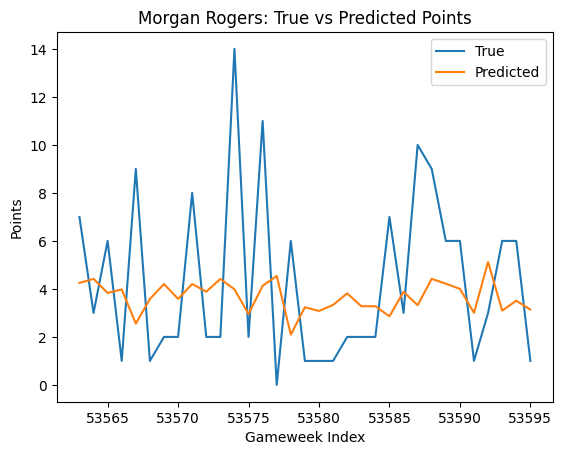

In [84]:
# Add predictions to test set
X_test["predicted_points"] = y_pred
X_test["true_points"] = y_test.values
X_test["global_player_id"] = df.iloc[X_test.index]["global_player_id"].values

# Filter for Håland
haaland_pred_df = X_test[X_test["global_player_id"] == 1070]

# Visualize
import matplotlib.pyplot as plt

plt.plot(haaland_pred_df.index, haaland_pred_df["true_points"], label="True")
plt.plot(haaland_pred_df.index, haaland_pred_df["predicted_points"], label="Predicted")
plt.title("Morgan Rogers: True vs Predicted Points")
plt.xlabel("Gameweek Index")
plt.ylabel("Points")
plt.legend()
plt.show()

In [11]:
print(X_test["global_player_id"].unique())

[ 736  738  739  743  744  745  750  752  758  760  761  762  763  766
  767  769  772  776  777  778  779  781  784  785  786  787  788  789
  790  791  793  794  796  797  798  799  800  802  803  804  805  806
  807  808  811  812  813  814  815  817  818  819  820  821  822  823
  824  825  826  827  828  829  830  831  832  833  834  835  836  837
  838  839  840  842  843  844  845  846  847  848  849  850  851  852
  853  854  855  856  857  858  860  861  862  863  864  865  866  867
  869  871  872  873  874  875  876  877  878  879  880  882  883  885
  886  887  888  889  890  891  892  893  894  896  897  899  900  901
  902  903  905  906  907  908  909  910  911  912  913  914  915  917
  918  919  921  922  923  924  925  927  928  929  930  931  932  933
  934  936  937  938  940  941  942  943  945  946  947  949  950  951
  952  953  954  955  956  957  959  960  961  963  964  965  967  968
  969  970  971  972  973  974  975  976  977  978  979  980  982  983
  984 

## List top 100 predicted players for GW1 2025/26 season:

In [85]:
import pandas as pd

# === Load model input dataset ===
df = pd.read_csv("../data/2022-23_to_2024-25_cleanV5.csv", low_memory=False)

# === Drop first 20 rows per player ===
df = (
    df.groupby("global_player_id", group_keys=False)
      .apply(lambda x: x.iloc[20:])
      .reset_index(drop=True)
)

# === Keep only rows where target is missing ===
test_df = df[df["total_points_next_gw"].isna()].copy()

# === Drop target column BEFORE prediction ===
test_df = test_df.drop(columns=["total_points_next_gw"], errors="ignore")

# === Drop unused columns (same as training) ===
columns_to_drop = [
    "name", "position", "team", "element", "fixture", "kickoff_time",
    "opponent_team", "round", "GW", "season", "modified",
    "mng_clean_sheets", "mng_draw", "mng_goals_scored",
    "mng_underdog_draw", "mng_underdog_win", "mng_win",
    "opponent_team_name", "next_kickoff_time", "next_opponent_team",
    "value_avg_change_last_1_gw", "value_volatility_last_1_gw", "mng_loss"
]
X_final_test = test_df.drop(columns=columns_to_drop, errors="ignore")

# === Predict with trained model ===
y_final_pred = model.predict(X_final_test)

# === Attach predictions ===
test_df["predicted_points"] = y_final_pred

# === Optional: Add player names back from original df ===
test_df["name"] = df.loc[test_df.index, "name"].values

# === Sort & save ===
top_players = test_df.sort_values("predicted_points", ascending=False).head(100)
top_players[["global_player_id", "name", "predicted_points"]].to_csv(
    "../data/final_gw_predictions.csv", index=False
)
print("✅ Final GW predictions saved to final_gw_predictions.csv")

✅ Final GW predictions saved to final_gw_predictions.csv


/var/folders/bp/1y4vldf10t3cpq328p2lbqzc0000gn/T/ipykernel_46848/347495998.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.iloc[20:])


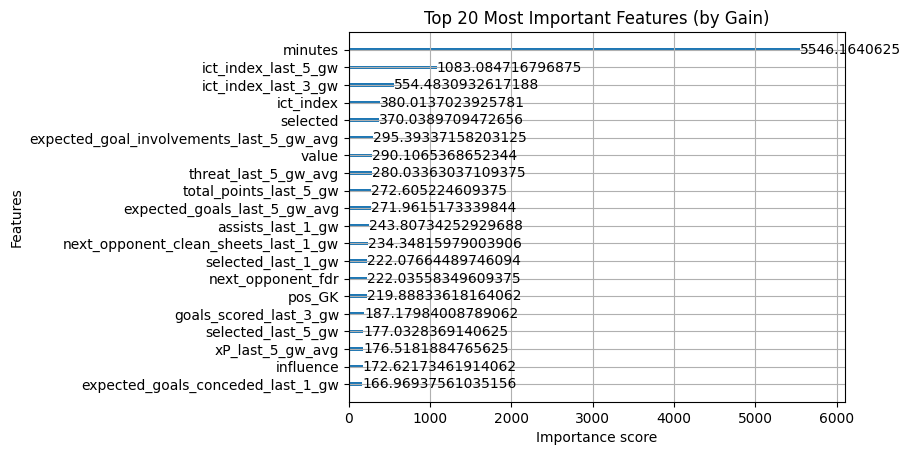

In [86]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Most Important Features (by Gain)")
plt.show()

In [88]:
import pandas as pd

# === Load model input dataset ===
df = pd.read_csv("../data/2022-23_to_2024-25_cleanV5.csv", low_memory=False)

# === Drop first 20 rows per player (for safe rolling windows) ===
df = (
    df.groupby("global_player_id", group_keys=False)
      .apply(lambda x: x.iloc[20:])
      .reset_index(drop=True)
)

# === Keep only rows where target is missing (e.g., upcoming GW) ===
test_df = df[df["total_points_next_gw"].isna()].copy()

# === Drop target column BEFORE prediction ===
test_df = test_df.drop(columns=["total_points_next_gw"], errors="ignore")

# === Drop unused columns (same as during training) ===
columns_to_drop = [
    "name", "position", "team", "element", "fixture", "kickoff_time",
    "opponent_team", "round", "GW", "season", "modified",
    "mng_clean_sheets", "mng_draw", "mng_goals_scored",
    "mng_underdog_draw", "mng_underdog_win", "mng_win",
    "opponent_team_name", "next_kickoff_time", "next_opponent_team",
    "value_avg_change_last_1_gw", "value_volatility_last_1_gw", "mng_loss"
]
X_final_test = test_df.drop(columns=columns_to_drop, errors="ignore")

# === Predict with trained model (assumed already loaded) ===
y_final_pred = model.predict(X_final_test)

# === Attach predictions ===
test_df["predicted_points"] = y_final_pred

# === Restore names and positions for readability ===
test_df["name"] = df.loc[test_df.index, "name"].values
test_df["position"] = df.loc[test_df.index, "position"].values

# === Top 100 overall ===
top_100 = test_df.sort_values("predicted_points", ascending=False).head(100)
print("\n🔝 Top 100 predicted players:")
print(top_100[["name", "position", "predicted_points"]].to_string(index=False))

# === Function for positional filtering ===
def get_top_by_position(pos, n):
    pos_df = test_df[test_df["position"] == pos]
    return pos_df.sort_values("predicted_points", ascending=False).head(n)[["name", "predicted_points"]]

# === Top 10 GKs ===
top_gks = get_top_by_position("GK", 10)
print("\n🧤 Top 10 Goalkeepers:")
print(top_gks.to_string(index=False))

# === Top 15 Forwards ===
top_fwds = get_top_by_position("FWD", 15)
print("\n⚽ Top 15 Forwards:")
print(top_fwds.to_string(index=False))

# === Top 15 midfielders ===
top_mids = get_top_by_position("MID", 15)
print("\n⚽ Top 15 Midfielders:")
print(top_mids.to_string(index=False))




🔝 Top 100 predicted players:
                               name position  predicted_points
                      Mohamed Salah      MID          6.699265
                        Bukayo Saka      MID          6.412347
                         Cody Gakpo      FWD          6.015582
                      Michael Olise      MID          6.015522
                        Cole Palmer      MID          5.985914
                     Erling Haaland      FWD          5.969609
                       Jarrod Bowen      MID          5.915538
                       Bryan Mbeumo      MID          5.763664
   Matheus Santos Carneiro Da Cunha      FWD          5.665623
                      Ollie Watkins      FWD          5.636405
                     Alexander Isak      FWD          5.574508
                         Chris Wood      FWD          5.521646
 Bernardo Veiga de Carvalho e Silva      MID          5.494176
                        Amad Diallo      MID          5.367090
                    IsmaÃ

/var/folders/bp/1y4vldf10t3cpq328p2lbqzc0000gn/T/ipykernel_46848/964487838.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.iloc[20:])


In [89]:
# === View a sample input row to the model ===
print("\n📥 Sample input row to the model (before prediction):")
print(X_final_test.iloc[0].to_string())


📥 Sample input row to the model (before prediction):
xP                                              0.000000
assists                                         0.000000
bonus                                           0.000000
bps                                             0.000000
clean_sheets                                    0.000000
creativity                                      0.000000
expected_assists                                0.000000
expected_goal_involvements                      0.000000
expected_goals                                  0.000000
expected_goals_conceded                         0.000000
goals_conceded                                  0.000000
goals_scored                                    0.000000
ict_index                                       0.000000
influence                                       0.000000
minutes                                         0.000000
own_goals                                       0.000000
penalties_missed                  